In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import pandas as pd

In [2]:
#数据加载
(image_train, label_train),\
(image_test, label_test) = mnist.load_data()

In [5]:
print('train data shape: ', image_train.shape)
print('train label shape: ', label_train.shape)
print('test data shape: ', image_test.shape)
print('test data shape: ', label_test.shape)

train data shape:  (60000, 28, 28)
train label shape:  (60000,)
test data shape:  (10000, 28, 28)
test data shape:  (10000,)


In [6]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='Greys')

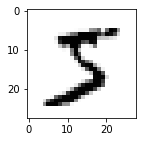

In [7]:
plot_image(image_train[0])

In [10]:
def plot_images_labels_predictions(images, labels, predictions, index_start, num = 10):
    index = index_start
    fig = plt.gcf()
    fig.set_size_inches(10, 12)
    for i in range(num):
        plt_sub = plt.subplot(5, 5, i+1)
        plt_sub.imshow(images[index], cmap='binary')
        title = 'label=' + str( labels[index] )
        if len(predictions) > 0:
            title += ', pred=' + str(predictions[index])
        plt_sub.set_title(title, fontsize=10)
        plt_sub.set_xticks([])
        plt_sub.set_yticks([])
        index += 1

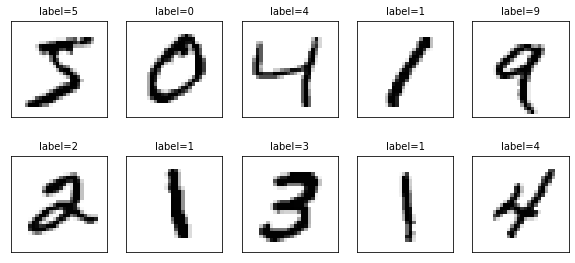

In [11]:
plot_images_labels_predictions(image_train, label_train, [], 0)

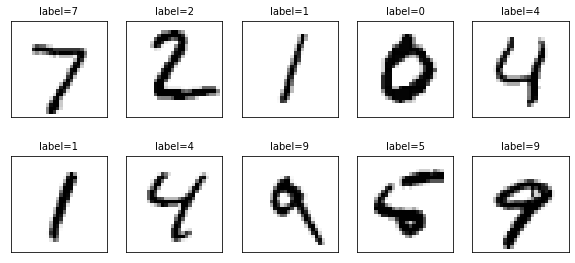

In [12]:
plot_images_labels_predictions(image_test, label_test, [], 0)

In [13]:
# 数据平坦化
image_train_flat = image_train.reshape(-1, 784)
image_test_flat = image_test.reshape(-1, 784)

In [14]:
#数据归一化
image_train_normalize = image_train_flat / 255
image_test_normalize = image_test_flat / 255

In [16]:
# One hot
print(label_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [17]:
label_train_onehot = keras.utils.to_categorical(label_train)
label_test_onehot = keras.utils.to_categorical(label_test)
print(label_train_onehot[0:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [20]:
# Create Model
model = keras.models.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(784,)),    
    keras.layers.Dense(10, activation='softmax')
])

#relu: max(0, x)
# softmax: 将向量变成概率分布 y = [e^x1/sum, e^x2/sum, e^x3/sum] -> [y1, y2, y3]
# sum = e^x1 + e^x2 + e^x3
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# Compile model
# sparse_categorical_crossentropy ?
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['categorical_accuracy'])

In [22]:
# Train
history = model.fit(image_train_normalize, label_train_onehot,
                    validation_split = 0.1, epochs=20, batch_size=200, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 - 3s - loss: 0.3671 - categorical_accuracy: 0.8992 - val_loss: 0.1592 - val_categorical_accuracy: 0.9580
Epoch 2/20
54000/54000 - 1s - loss: 0.1623 - categorical_accuracy: 0.9541 - val_loss: 0.1156 - val_categorical_accuracy: 0.9693
Epoch 3/20
54000/54000 - 1s - loss: 0.1126 - categorical_accuracy: 0.9681 - val_loss: 0.0942 - val_categorical_accuracy: 0.9737
Epoch 4/20
54000/54000 - 1s - loss: 0.0841 - categorical_accuracy: 0.9761 - val_loss: 0.0854 - val_categorical_accuracy: 0.9743
Epoch 5/20
54000/54000 - 2s - loss: 0.0660 - categorical_accuracy: 0.9811 - val_loss: 0.0779 - val_categorical_accuracy: 0.9765
Epoch 6/20
54000/54000 - 1s - loss: 0.0528 - categorical_accuracy: 0.9849 - val_loss: 0.0722 - val_categorical_accuracy: 0.9793
Epoch 7/20
54000/54000 - 1s - loss: 0.0423 - categorical_accuracy: 0.9883 - val_loss: 0.0689 - val_categorical_accuracy: 0.9812
Epoch 8/20
54000/54000 - 1s - loss: 0.0356 - categorica

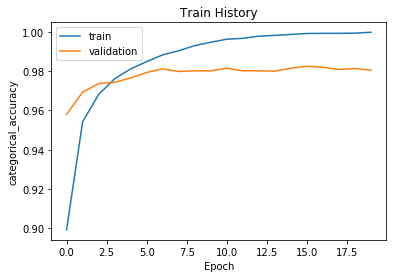

In [25]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='best')

show_train_history(history, 'categorical_accuracy','val_categorical_accuracy')  

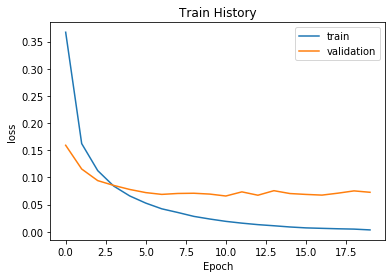

In [26]:
show_train_history(history, 'loss', 'val_loss')

In [28]:
model.evaluate(image_test_normalize, label_test_onehot, verbose=2)

10000/1 - 0s - loss: 0.0348 - categorical_accuracy: 0.9808


[0.06958338924057061, 0.9808]

In [30]:
#Predict
pred = model.predict_classes(image_test_normalize)

In [31]:
print(pred[0:10])

[7 2 1 0 4 1 4 9 6 9]


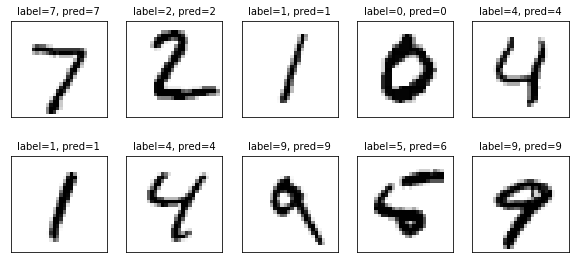

In [32]:
plot_images_labels_predictions(image_test, label_test, pred, index_start=0)

In [33]:
#错误数据分析
pd.crosstab(label_test, pred, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,0,0,1,1,3,2,1,3,0
1,0,1124,4,1,0,1,2,1,2,0
2,3,1,1012,1,2,0,2,4,7,0
3,0,0,2,992,0,3,0,5,5,3
4,0,1,3,1,968,0,3,0,2,4
5,2,0,0,6,1,873,4,2,3,1
6,4,2,2,1,4,3,942,0,0,0
7,0,4,9,2,0,0,0,1009,3,1
8,0,0,2,3,5,3,2,2,955,2


In [34]:
df = pd.DataFrame({'label':label_test, 'predict':pred})
df[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [35]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2597,5,3
4360,5,3
5937,5,3
5982,5,3


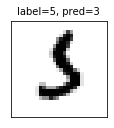

In [38]:
plot_images_labels_predictions(image_test, label_test, pred, index_start=340, num=1)

In [39]:
df[(df.label==9)&(df.predict==4)]

,label,predict
1232,9,4
1901,9,4
2406,9,4
2414,9,4
2426,9,4
2720,9,4
2760,9,4
2863,9,4
3460,9,4
3985,9,4


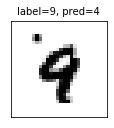

In [41]:
plot_images_labels_predictions(image_test, label_test, pred, index_start=9587, num=1)